#  World Happiness 2019 Dataset report by Mufunwa Nemushungwa - 13 July 2023

In this report, we will conduct an exploratory data analysis on the World Happiness 2019 dataset. The dataset includes information about happiness scores and various factors that contribute to happiness across different countries.

## Data Description

The World Happiness 2019 dataset consists of the following nine variables:

* Country or Region: The name of the country or the region to which the country belongs.
* Happiness Rank: The country's rank is based on its happiness score.
* Happiness Score: A metric that measures the overall happiness and well-being in a country based on survey responses.
* GDP per capita: The country's Gross Domestic Product per capita, which reflects its economic performance and living standards.
* Social support: The extent of social support available within a country, including support from family, friends, and social networks.
* Healthy life expectancy: The average number of years a person can expect to live in good health.
* Freedom to make life choices: The degree to which individuals have freedom in making life choices, such as choosing their occupation or personal decisions.
* Generosity: The level of generosity within a country, as measured by charitable donations and volunteering.
* Perceptions of corruption: The perception of corruption within a country, as reported by surveys and assessments

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
#read in dataset

df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
df.shape

(156, 9)

The dataset has records on 156 countries/regions

In [3]:
# check the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
#check for null values
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
#check for missing values
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

The dataset is complete (no null or missing values) and therefore, no imputations are required.

In [7]:
df.duplicated().sum()

0

The dataset has no duplicates

# Exploratory Data Analysis

## Summary statistics

In [20]:
numerical_df = df.iloc[:,2:]
numerical_df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Data preprocessing

In [22]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix

scaler = MinMaxScaler()

## We removed the overall rank feature
numerical_df= pd.DataFrame(scaler.fit_transform(numerical_df), columns =['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'] )

The variables in the dataset have different scales; for example, the score variable is much larger than the other variables. We normalised the data using the MinMAx scaler from the Sklearn library. The data normalisation process helps bring all variables to a similar scale, allowing for easier comparison and analysis. By rescaling the data, we can avoid any potential bias or distortion that may arise from the differing scales of the variables. 

## Data visualization

### Scatter matrix

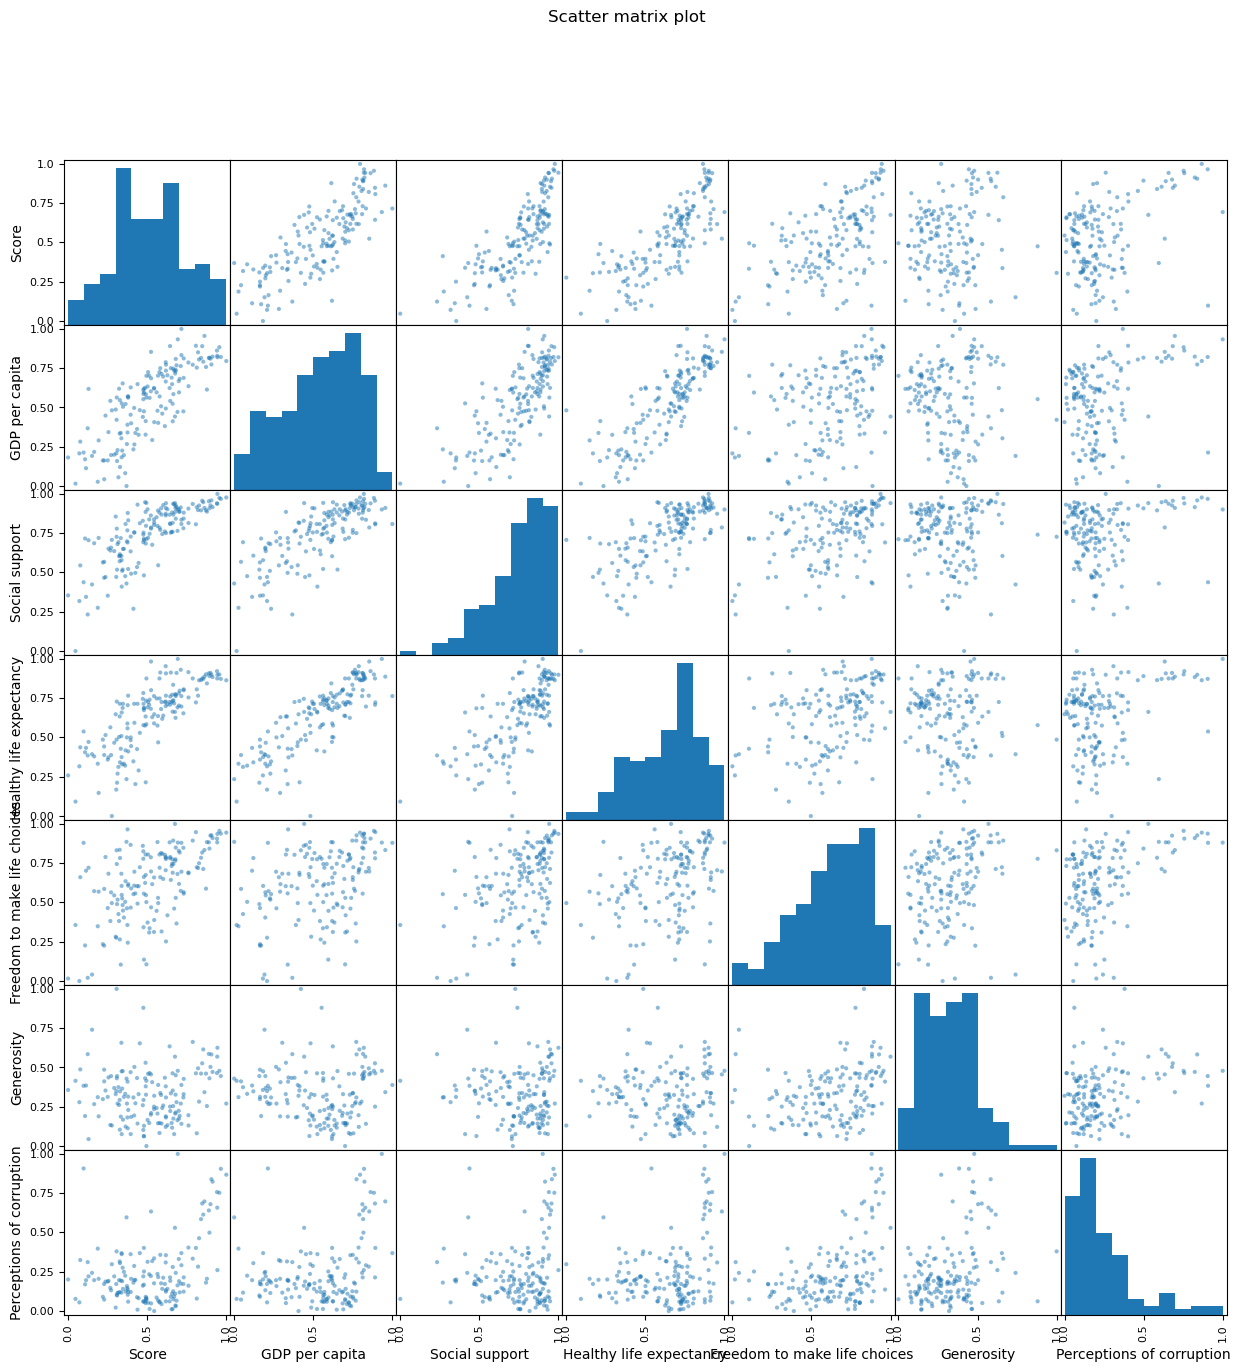

In [23]:
scatter_matrix(numerical_df,figsize =(15,15))
plt.suptitle("Scatter matrix plot")
plt.show()

### Observations (Histograms)

* The majority of the histograms of the features appear to be skewed and do not have a bell-curve shape. This  suggests that the data is not normally distributed. Skewed histograms indicate that the data is concentrated towards one end, either on the left or right side, rather than being evenly spread out. This could be due to various factors, such as outliers or a specific pattern in the data.

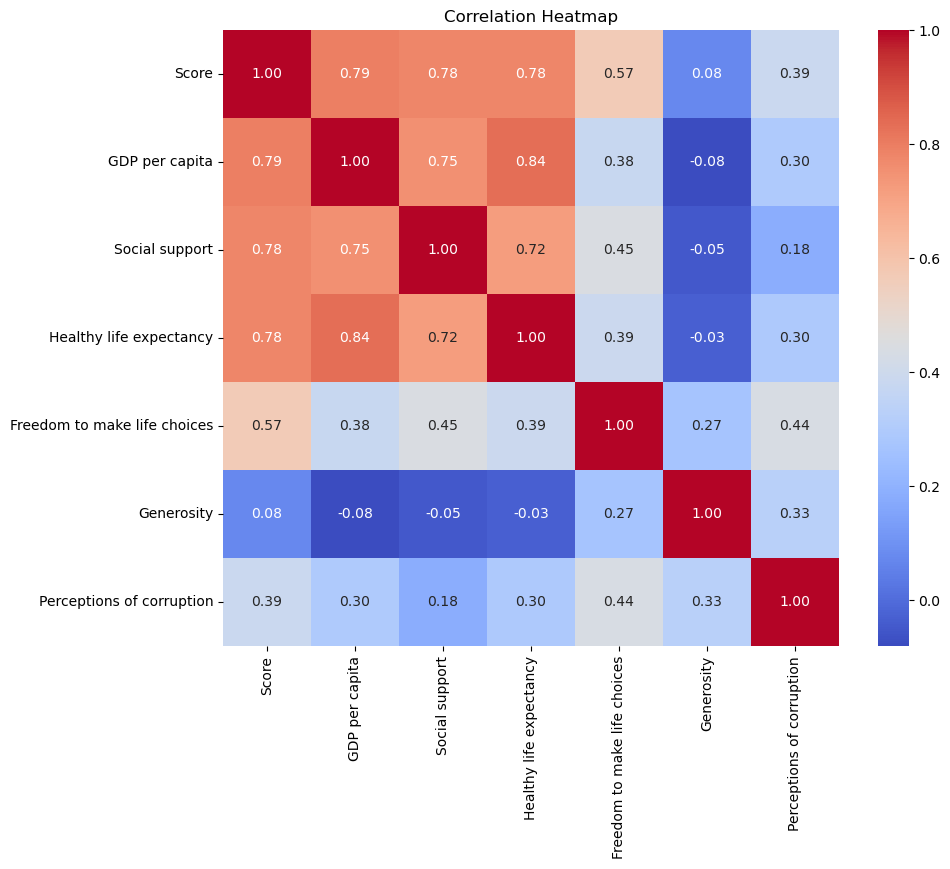

In [24]:
corr_mat =numerical_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

### Observations from the scattermatrix and correlation heatmap 

The scatterplots show a positive correlation between most features, with little to no correlation among other features. This suggests that as one feature increases, other features tend to increase as well. However, the lack of correlation indicates that changes in one feature do not necessarily result in changes in others. The heatmap provides an interpretation of this relationship, with values close to 1 indicating a strong positive correlation, zero indicating a weak correlation, and -1 indicating a strong negative correlation. The happiness score is strongly associated with higher GDP per capita, social support, and healthy life expectancy. However, there is a lesser correlation between generosity, views of corruption, and happiness scores. Factors such as income, social connections, and overall well-being play a significant role in determining happiness levels. While generosity and perceptions of corruption may still influence happiness, they are not as closely tied to the overall happiness score as the other factors mentioned.

### Happiness scores on the 6 continents

Next, we looked at the differences in scores between the countries on different continents.

In [26]:

#creating a continent feature 
country_continent = {
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Iceland': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'New Zealand': 'Oceania',
    'Canada': 'North America',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Costa Rica': 'North America',
    'Israel': 'Asia',
    'Luxembourg': 'Europe',
    'United Kingdom': 'Europe',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'United States': 'North America',
    'Czech Republic': 'Europe',
    'United Arab Emirates': 'Asia',
    'Malta': 'Europe',
    'Mexico': 'North America',
    'France': 'Europe',
    'Taiwan': 'Asia',
    'Chile': 'South America',
    'Guatemala': 'North America',
    'Saudi Arabia': 'Asia',
    'Qatar': 'Asia',
    'Spain': 'Europe',
    'Panama': 'North America',
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Singapore': 'Asia',
    'El Salvador': 'North America',
    'Italy': 'Europe',
    'Bahrain': 'Asia',
    'Slovakia': 'Europe',
    'Trinidad & Tobago': 'North America',
    'Poland': 'Europe',
    'Uzbekistan': 'Asia',
    'Lithuania': 'Europe',
    'Colombia': 'South America',
    'Slovenia': 'Europe',
    'Nicaragua': 'North America',
    'Kosovo': 'Europe',
    'Argentina': 'South America',
    'Romania': 'Europe',
    'Cyprus': 'Asia',
    'Ecuador': 'South America',
    'Kuwait': 'Asia',
    'Thailand': 'Asia',
    'Latvia': 'Europe',
    'South Korea': 'Asia',
    'Estonia': 'Europe',
    'Jamaica': 'North America',
    'Mauritius': 'Africa',
    'Japan': 'Asia',
    'Honduras': 'North America',
    'Kazakhstan': 'Asia',
    'Bolivia': 'South America',
    'Hungary': 'Europe',
    'Paraguay': 'South America',
    'Northern Cyprus': 'Asia',
    'Peru': 'South America',
    'Portugal': 'Europe',
    'Pakistan': 'Asia',
    'Russia': 'Europe',
    'Philippines': 'Asia',
    'Serbia': 'Europe',
    'Moldova': 'Europe',
    'Libya': 'Africa',
    'Montenegro': 'Europe',
    'Tajikistan': 'Asia',
    'Croatia': 'Europe',
    'Hong Kong': 'Asia',
    'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Turkey': 'Asia',
    'Malaysia': 'Asia',
    'Belarus': 'Europe',
    'Greece': 'Europe',
    'Mongolia': 'Asia',
    'North Macedonia': 'Europe',
    'Nigeria': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Turkmenistan': 'Asia',
    'Algeria': 'Africa',
    'Morocco': 'Africa',
    'Azerbaijan': 'Asia',
    'Lebanon': 'Asia',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Bhutan': 'Asia',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Ghana': 'Africa',
    'Ivory Coast': 'Africa',
    'Nepal': 'Asia',
    'Jordan': 'Asia',
    'Benin': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Gabon': 'Africa',
    'Laos': 'Asia',
    'South Africa': 'Africa',
    'Albania': 'Europe',
    'Venezuela': 'South America',
    'Cambodia': 'Asia',
    'Palestinian Territories': 'Asia',
    'Senegal': 'Africa',
    'Somalia': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Burkina Faso': 'Africa',
    'Armenia': 'Asia',
    'Iran': 'Asia',
    'Guinea': 'Africa',
    'Georgia': 'Asia',
    'Gambia': 'Africa',
    'Kenya': 'Africa',
    'Mauritania': 'Africa',
    'Mozambique': 'Africa',
    'Tunisia': 'Africa',
    'Bangladesh': 'Asia',
    'Iraq': 'Asia',
    'Congo (Kinshasa)': 'Africa',
    'Mali': 'Africa',
    'Sierra Leone': 'Africa',
    'Sri Lanka': 'Asia',
    'Myanmar': 'Asia',
    'Chad': 'Africa',
    'Ukraine': 'Europe',
    'Ethiopia': 'Africa',
    'Swaziland': 'Africa',
    'Uganda': 'Africa',
    'Egypt': 'Africa',
    'Zambia': 'Africa',
    'Togo': 'Africa',
    'India': 'Asia',
    'Liberia': 'Africa',
    'Comoros': 'Africa',
    'Madagascar': 'Africa',
    'Lesotho': 'Africa',
    'Burundi': 'Africa',
    'Zimbabwe': 'Africa',
    'Haiti': 'North America',
    'Botswana': 'Africa',
    'Syria': 'Asia',
    'Malawi': 'Africa',
    'Yemen': 'Asia',
    'Rwanda': 'Africa',
    'Tanzania': 'Africa',
    'Afghanistan': 'Asia',
    'Central African Republic': 'Africa',
    'South Sudan': 'Africa'
}


In [29]:
Continent = [continent for continent in country_continent.values()]

In [70]:
#create a new dataframe
df2 = df

#add the continent variable to it
df2['Continent'] = Continent
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


###  Average GDP 

In [31]:
## Average GDP for each continent

avg_ContinentGDP = df2.groupby("Continent")['GDP per capita'].mean()
avg_ContinentGDP

Continent
Africa           0.498467
Asia             0.980283
Europe           1.219900
North America    0.952385
Oceania          1.337500
South America    0.982700
Name: GDP per capita, dtype: float64

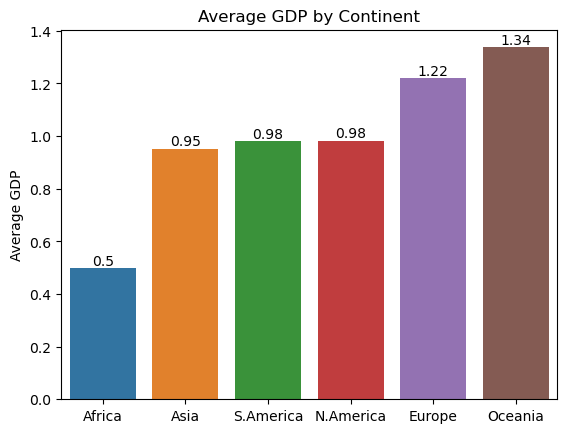

In [34]:
ax = sns.barplot(x=Continents, y=sorted(avg_ContinentGDP))

plt.ylabel('Average GDP')
plt.title('Average GDP by Continent')

# Adding bar labels
for i, v in enumerate(sorted(avg_ContinentGDP)):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [64]:
### Min GDP

GDP = df2.groupby("Continent")['GDP per capita'].min()
GDP

Continent
Africa           0.000
Asia             0.287
Europe           0.685
North America    0.323
Oceania          1.303
South America    0.776
Name: GDP per capita, dtype: float64

In [63]:
### Max GDP

GDP = df2.groupby("Continent")['GDP per capita'].max()
GDP

Continent
Africa           1.120
Asia             1.684
Europe           1.609
North America    1.433
Oceania          1.372
South America    1.159
Name: GDP per capita, dtype: float64

### Average score

In [65]:
avg_ContinentScore = df2.groupby("Continent")['Score'].mean()
avg_ContinentScore

Continent
Africa           4.368289
Asia             5.265739
Europe           6.274050
North America    6.154692
Oceania          7.267500
South America    5.920200
Name: Score, dtype: float64

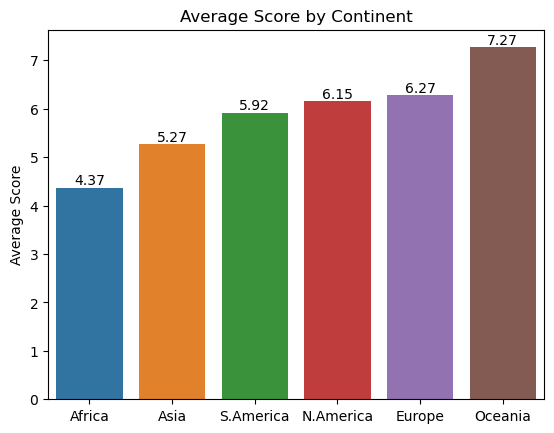

In [67]:
axes =sns.barplot(x=Continents, y=sorted(avg_ContinentScore))

# Adding bar labels
for j, w in enumerate(sorted(avg_ContinentScore)):
    axes.text(j, w, str(round(w, 2)), ha='center', va='bottom')
plt.ylabel('Average Score')
plt.title('Average Score by Continent')
plt.show()

### Low ranking countries

In [81]:
#Bottom 40 countries

df2.tail(40)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
116,117,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125,Asia
117,118,Guinea,4.534,0.380,0.829,0.375,0.332,0.207,0.086,Africa
118,119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164,Asia
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,Africa
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053,Africa
121,122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Africa
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,Africa
123,124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,Africa
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143,Asia
125,126,Iraq,4.437,1.043,0.980,0.574,0.241,0.148,0.089,Asia


### Observations ( Average GDP and Happiness scores)

Oceania, Europe, and North America exhibit high average GDP and happiness scores, suggesting greater economic prosperity and overall well-being compared to other regions. Stable political systems, access to education and healthcare, and opportunities for economic growth are likely contributing factors to their higher scores. Conversely, Africa, Asia, and South America display lower average GDP and happiness scores, indicating challenges in terms of economic development and overall well-being. Factors such as political instability, limited access to education and healthcare, and economic inequalities may contribute to the lower scores observed in these regions. Countries with higher happiness scores and GDP were ranked higher, and the majority of these countries are on the Oceania, Europe, and North America continents. Conversely , countries in Africa and parts of the Middle East tend to have lower GDP and happiness scores. This could be attributed to factors such as ongoing conflicts, widespread poverty, and inadequate infrastructure. These regions face significant challenges in achieving economic development and improving the well-being of their populations. 


### Average Generosity scores

In [191]:
avg_ContinentGenerosity = df2.groupby("Continent")['Generosity'].mean()
avg_ContinentGenerosity

Continent
Africa           0.175244
Asia             0.211543
Europe           0.173875
North America    0.186923
Oceania          0.331000
South America    0.117200
Name: Generosity, dtype: float64

### Observations 

Countries in Asia and Oceania have the highest generosity scores, indicating a strong culture of giving and helping others. In contrast, countries in Europe, South America, and North America tend to have lower generosity scores, suggesting a more individualistic approach to societal well-being. These differences in generosity can be influenced by cultural norms, economic disparities, and social structures within each region. 

### Perceptions of corruption

In [84]:
max_ContinentCorruption = df2.groupby("Continent")['Perceptions of corruption'].max()
max_ContinentCorruption

Continent
Africa           0.411
Asia             0.453
Europe           0.410
North America    0.308
Oceania          0.380
South America    0.150
Name: Perceptions of corruption, dtype: float64

### Observations

Africa, Asia, and Europe exhibit high levels of perceived corruption, followed by Oceania and North America, while South America has the lowest perception of corruption. However, there is a weak correlation between the level of perceived corruption and the overall happiness score of a region. This implies that, although corruption may influence societal well-being, it is not the sole factor determining happiness. Other elements, such as social support, economic stability, and personal freedoms, also contribute to the overall happiness levels across different regions.

In [142]:
#looking at the countries

top_10_Freedom = df.nlargest(10,'Freedom to make life choices').loc[:,['Country or region',
                                                                       'Freedom to make life choices']]
top_10_Freedom

,Country or region,Freedom to make life choices
40,Uzbekistan,0.631
108,Cambodia,0.609
2,Norway,0.603
20,United Arab Emirates,0.598
0,Finland,0.596
1,Denmark,0.592
3,Iceland,0.591
7,New Zealand,0.585
8,Canada,0.584
6,Sweden,0.574


The majority of the top 10 countries with high levels of personal freedom are among the top ranked countries. Higher levels of personal freedom seem to be positively correlated with higher happiness scores. This suggests that individuals in countries with greater personal freedoms are more likely to experience overall happiness. However, it is important to note that personal freedom alone does not guarantee happiness, as other factors such as economic stability and social support also play significant roles in determining happiness levels. 

In [86]:
bottom_10_Freedom = df.nsmallest(10,'Freedom to make life choices').loc[:,['Country or region',
                                                                       'Freedom to make life choices']]
bottom_10_Freedom

,Country or region,Freedom to make life choices
153,Afghanistan,0.000
155,South Sudan,0.010
148,Syria,0.013
146,Haiti,0.026
121,Mauritania,0.066
81,Greece,0.067
87,Algeria,0.086
141,Comoros,0.142
150,Yemen,0.143
142,Madagascar,0.148


The majority of the bottom 10 countries are in war, have unstable economies , and lack social support systems. These factors contribute to a decrease in overall happiness levels as individuals face constant uncertainty, violence, and a lack of basic necessities. Therefore, it is evident that personal freedom is just one aspect of a complex web of factors that influence happiness levels in a country. 

## Conclusion

The data analysis reveals distinct patterns and variations in happiness scores, generosity, perceived corruption, and personal freedom across different regions. Oceania, Europe, and North America have higher average GDP and happiness scores, indicating greater economic prosperity and well-being. Africa, Asia, and South America face challenges in economic development and overall well-being, resulting in lower scores. Countries in Africa and Oceania exhibit higher generosity scores, while Europe, South America, and North America have lower generosity scores. Perceived corruption levels also vary, with Africa, Asia, and Europe having higher levels and South America having the lowest. Personal freedom is positively correlated with higher happiness scores, but it is not the sole determinant of happiness. Understanding these factors can help policymakers and stakeholders address challenges faced by regions with lower scores and promote well-being for all. A holistic approach is needed to improve happiness levels and well-being by fostering economic growth, social cohesion, and individual empowerment.